In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem




In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [4]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"#relative file path
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"



In [5]:
# Read the Mouse and Drug Data 
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
#Read the Clinical Trial Data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
data = pd.merge(mouse_data,clinical_data)
data= data.rename(columns = {'Tumor Volume (mm3)': 'Tumor_Vol_mm3',
                            'Timepoint': 'Time'})
# Display the data table for preview
data.head()

,Mouse ID,Drug,Time,Tumor_Vol_mm3,Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_mean= data.groupby(['Drug','Time'])['Tumor_Vol_mm3'].mean()

# Convert to DataFrame
df_mean = pd.DataFrame(df_mean)
# Preview DataFrame
df_mean = df_mean.reset_index()
df_mean

,Drug,Time,Tumor_Vol_mm3
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_sem= data.groupby(['Drug','Time'])['Tumor_Vol_mm3'].sem()

# Convert to DataFrame
df_sem = pd.DataFrame(df_sem)

# Preview DataFrame
df_sem = df_sem.reset_index()
df_sem

,Drug,Time,Tumor_Vol_mm3
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
# Minor Data Munging to Re-Format the Data Frames
#df_2['Tumor_Vol_mm3'] = pd.to_numeric(df_2['Tumor_Vol_mm3'])*100
df_3 = pd.DataFrame(df_mean.pivot(index='Time', columns='Drug', values='Tumor_Vol_mm3'))
df_4 = df_3.reset_index()
# Preview that Reformatting worked
df_4

Drug,Time,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [11]:
# Minor Data Munging to Re-Format the Data Frames
#df_2['Tumor_Vol_mm3'] = pd.to_numeric(df_2['Tumor_Vol_mm3'])*100
df_5 = pd.DataFrame(df_sem.pivot(index='Time', columns='Drug', values='Tumor_Vol_mm3'))
df_6 = df_5.reset_index()
# Preview that Reformatting worked
df_6

Drug,Time,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


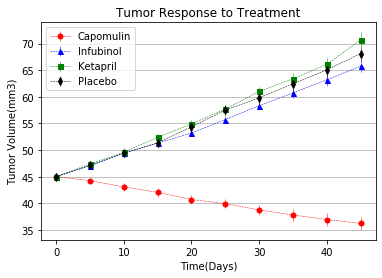

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(df_4['Time'], df_4["Capomulin"], yerr=df_6["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_4['Time'], df_4["Infubinol"], yerr=df_6["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_4['Time'], df_4["Ketapril"], yerr=df_6["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_4['Time'], df_4["Placebo"], yerr=df_6["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.grid(axis='y')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"],loc='best fit')




![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

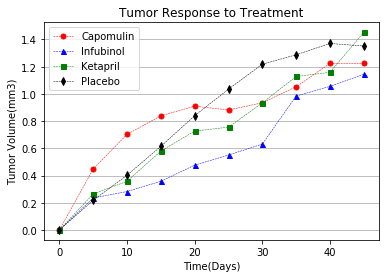

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint ,Convert to DataFrame, Preview DataFrame and Generate the Plot (with Error Bars)
# df_6 is the dataframe - Mean Met. Site Data Grouped by Drug and Timepoint
plt.errorbar(df_6['Time'], df_6["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_6['Time'], df_6["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_6['Time'], df_6["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_6['Time'], df_6["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.grid(axis='y')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"],loc='best fit')



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#Convert to DataFrame
#Preview DataFrame

df_count= data.groupby(['Drug','Time'])['Tumor_Vol_mm3'].count()

# Convert to DataFrame
df_count = pd.DataFrame(df_count)
df_count = df_count.reset_index()


df_count = pd.DataFrame(df_count.pivot(index='Time', columns='Drug', values='Tumor_Vol_mm3'))
df_count = df_count.reset_index()

# Preview that Reformatting worked
df_count

Drug,Time,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


Text(0, 0.5, 'Survival Rate(%)')

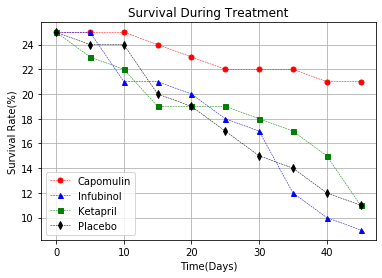

In [15]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(df_count['Time'], df_count["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_count['Time'], df_count["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_count['Time'], df_count["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_count['Time'], df_count["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.grid()
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"],loc='best fit')
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
# Display the data to confirm

df_pcnt = df_4.set_index('Time')
df_pcnt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Time,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [17]:
# Calculate the percent changes for each drug
# Display the data to confirm
drug_lst = ['Capomulin','Infubinol','Ketapril','Placebo']
df_pcnt.loc[5,drug_lst]
pcnt_chng = (df_pcnt.loc[45,drug_lst]-df_pcnt.loc[0,drug_lst])/df_pcnt.loc[0,drug_lst]*100
pcnt_chng


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

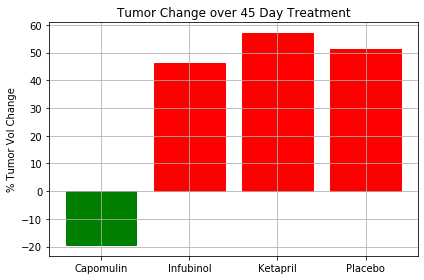

In [18]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure

barlist = plt.bar(height=pcnt_chng,x =drug_lst)
barlist[0].set_color('g')
barlist[1].set_color('r')
barlist[2].set_color('r')
barlist[3].set_color('r')
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Vol Change")
plt.grid()
plt.tight_layout()


![Metastatic Spread During Treatment](../Images/change.png)